# Unit 2 -- The `R`+Finance Ecosystem

|        Time | Subject                                                        |
|:------------|----------------------------------------------------------------|
| 08:30-08:45 | Unit 1 -- Welcome and Intro                                    |
| 08:45-09:30 | **Unit 2 -- Financial Ecosystem: `quantmod`, `xts`, Plotting** |
| 09:45-10:30 | Unit 3 -- Volatility Modeling: `rugarch` and `rmgarch`         |
| 10:45-11:30 | Unit 4 -- Performance and Portfolio Analysis                   |
| 11:45-12:30 | Unit 5 -- Bayesian Modeling: `Stan`                            |


# The Financial Package Ecosystem

`R` has a rich system of financial packages. 

They don't all play well with the `tidyverse` style which is gaining in popularity, so if you switch between the two systems, you might encounter a bit of friction.

## `xts`

The `xts` package -- E**x**tensible **T**ime **S**eries -- is the basic time series class for the financial ecosystem. 

Fundamental model: 
- irregular time stamps (at millsecond resolution + nanosecond with add-ons)
- matrices rather than data frames for performance
- each column is a series (observable: e.g., bid and ask)

`xts` supports ISO-8601 indexing for time series manipulation -- we'll see examples below

Cheat sheet: <https://www.datacamp.com/community/blog/r-xts-cheat-sheet>

## `TTR`

The `TTR` package -- **T**echnical **T**rading **R**ules -- implements the basic build-blocks of many trading rules: 
- moving average calculations
- roling means / medians / standard deviations
- volatility calculations
- commonly used technical indicators (Bollinger bands, KST, Donchian Channel, *etc.*)  

## `quantmod`

The `quantmod` package is a "wrapper" for most of the major financial packages, as well as providing some useful functionality which doesn't fit elsewhere. 

We will make extensive use of it for two features: 
- attractive plots ("charting")
- downloading financial data

In [19]:
library(quantmod)
library(TTR)
library(xts)

In [20]:
## Do this -- prevents magic
options(getSymbols.auto.assign=FALSE)

In [21]:
## Downloads from Yahoo! Finance and makes an SPY time series
SPY <- getSymbols("SPY") 
head(SPY)

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2007-01-03   142.25   142.86  140.57    141.37   94807600     112.1704
2007-01-04   141.23   142.05  140.61    141.67   69620600     112.4085
2007-01-05   141.33   141.40  140.38    140.54   76645300     111.5118
2007-01-08   140.82   141.41  140.25    141.19   71655000     112.0276
2007-01-09   141.31   141.60  140.40    141.07   75680100     111.9324
2007-01-10   140.58   141.57  140.30    141.54   72428000     112.3053

In [22]:
## To extract OHLCVA columns produced by quantmod, 
## use the Op(), Hi(), Lo(), Cl(), Vo(), or Ad() columns
head(Ad(SPY))

           SPY.Adjusted
2007-01-03     112.1704
2007-01-04     112.4085
2007-01-05     111.5118
2007-01-08     112.0276
2007-01-09     111.9324
2007-01-10     112.3053

In [23]:
## xts provides useful subsetting and aggregation routines

## To subset to a particular year: 
SPY["2007"]

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2007-01-03   142.25   142.86  140.57    141.37   94807600     112.1704
2007-01-04   141.23   142.05  140.61    141.67   69620600     112.4085
2007-01-05   141.33   141.40  140.38    140.54   76645300     111.5118
2007-01-08   140.82   141.41  140.25    141.19   71655000     112.0276
2007-01-09   141.31   141.60  140.40    141.07   75680100     111.9324
2007-01-10   140.58   141.57  140.30    141.54   72428000     112.3053
2007-01-11   141.58   142.62  141.50    142.16   54476800     112.7972
2007-01-12   142.15   143.24  142.11    143.24   55370600     113.6542
2007-01-16   143.07   143.44  142.73    142.96   44871300     113.4320
2007-01-17   142.85   143.46  142.73    143.02   50241400     113.4796
2007-01-18   143.17   143.26  142.31    142.54   68177300     113.0988
2007-01-19   142.54   143.10  142.46    142.82   56973000     113.3209
2007-01-22   143.07   143.10  141.93    142.38   60253600     112.9718
2007-0

In [24]:
## More complex subsetting
SPY["2007-06"]

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2007-06-01   153.88   154.40  153.51    154.08  107771700     122.7401
2007-06-04   153.54   154.39  153.48    154.10   78008800     122.7561
2007-06-05   153.74   153.90  152.86    153.49  126917900     122.2701
2007-06-06   152.86   152.95  151.75    151.84  164096800     120.9557
2007-06-07   151.56   152.50  149.06    149.10  232414600     118.7730
2007-06-08   149.58   151.19  149.09    151.04  175886000     120.3184
2007-06-11   150.93   151.95  150.70    151.30  102015600     120.5255
2007-06-12   150.67   151.54  149.55    149.65  233898000     119.2112
2007-06-13   150.50   152.07  149.72    151.89  193208200     120.9955
2007-06-14   152.06   153.12  152.03    152.86  146396500     121.7682
2007-06-15   153.14   153.66  152.93    153.07  154030800     122.4611
2007-06-18   153.38   153.39  152.66    152.89   88537500     122.3171
2007-06-19   152.55   153.38  152.36    153.27  110851700     122.6211
2007-0

In [25]:
## Up to a data
SPY["/2007-04-23"]

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2007-01-03   142.25   142.86  140.57    141.37   94807600     112.1704
2007-01-04   141.23   142.05  140.61    141.67   69620600     112.4085
2007-01-05   141.33   141.40  140.38    140.54   76645300     111.5118
2007-01-08   140.82   141.41  140.25    141.19   71655000     112.0276
2007-01-09   141.31   141.60  140.40    141.07   75680100     111.9324
2007-01-10   140.58   141.57  140.30    141.54   72428000     112.3053
2007-01-11   141.58   142.62  141.50    142.16   54476800     112.7972
2007-01-12   142.15   143.24  142.11    143.24   55370600     113.6542
2007-01-16   143.07   143.44  142.73    142.96   44871300     113.4320
2007-01-17   142.85   143.46  142.73    143.02   50241400     113.4796
2007-01-18   143.17   143.26  142.31    142.54   68177300     113.0988
2007-01-19   142.54   143.10  142.46    142.82   56973000     113.3209
2007-01-22   143.07   143.10  141.93    142.38   60253600     112.9718
2007-0

In [26]:
## We can also summarize to higher frequencies
## Note that everything is converted correctly 
to.monthly(SPY)

         SPY.Open SPY.High SPY.Low SPY.Close  SPY.Volume SPY.Adjusted
Jan 2007   142.25   144.13  140.25    143.75  1330329900    114.05879
Feb 2007   144.15   146.42  139.00    140.93  1494548900    111.82127
Mar 2007   139.34   143.81  136.75    142.00  2918304400    113.11716
Apr 2007   142.16   149.80  141.48    148.29  1791289900    118.12781
May 2007   148.42   153.89  147.67    153.32  2508178000    122.13468
Jun 2007   153.88   154.40  148.06    150.43  3502885400    120.34897
Jul 2007   150.87   155.53  145.04    145.72  3988676200    116.58085
Aug 2007   145.18   150.59  137.00    147.59  6195918600    118.07684
Sep 2007   147.45   154.39  144.33    152.58  2967009200    122.64813
Oct 2007   152.60   157.52  148.66    154.65  3850069600    124.31202
Nov 2007   153.29   153.41  140.66    148.66  5472709900    119.49714
Dec 2007   148.19   152.89  143.96    146.21  3293787500    118.15152
Jan 2008   146.53   146.99  126.00    137.37  6106834300    111.00796
Feb 2008   137.94   

In [27]:
nmonths(SPY)

[1] 136

In [28]:
to.yearly(SPY)

           SPY.Open SPY.High SPY.Low SPY.Close  SPY.Volume SPY.Adjusted
2007-12-31   142.25   157.52  136.75    146.21 39313707500    118.15152
2008-12-31   146.53   146.99   74.34     90.24 75960832400     74.67767
2009-12-31    90.44   113.03   67.10    111.44 62062517700     94.35655
2010-12-31   112.37   126.20  101.13    125.75 52842437000    108.56301
2011-12-30   126.71   137.18  107.43    125.50 54991433900    110.62026
2012-12-31   127.76   148.11  126.43    142.41 35832734200    128.30884
2013-12-31   145.11   184.69  144.73    184.69 30627778200    169.76253
2014-12-31   183.98   212.97  173.71    205.54 27670351600    192.61905
2015-12-31   206.38   213.78  182.40    203.87 30968282300    194.99696
2016-12-30   200.49   228.34  181.02    223.53 26294011500    218.39249
2017-12-29   225.04   268.60  223.88    266.86 17664367800    265.79544
2018-04-23   267.84   286.58  252.92    266.57  8802363700    266.57001

In [29]:
to.weekly(SPY)

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2007-01-05   142.25   142.86  140.38    140.54  241073500    111.51183
2007-01-12   140.82   143.24  140.25    143.24  329610500    113.65416
2007-01-19   143.07   143.46  142.31    142.82  220263000    113.32091
2007-01-26   143.07   143.98  141.58    142.13  310992100    112.77344
2007-02-02   142.19   144.95  141.74    144.81  347310200    114.89989
2007-02-09   144.70   145.36  143.39    143.94  308181700    114.20960
2007-02-16   143.94   145.95  143.19    145.73  274335200    115.62986
2007-02-23   145.56   146.42  145.00    145.30  271917000    115.28863
2007-03-02   145.83   145.95  138.05    138.67  896598200    110.02804
2007-03-09   137.93   141.42  137.33    140.78  627885300    111.70226
2007-03-16   140.42   141.34  136.75    138.53  756793400    110.35298
2007-03-23   139.26   143.81  139.15    143.39  524036300    114.22443
2007-03-30   143.50   143.65  140.56    142.00  634186800    113.11716
2007-0

In [30]:
first(SPY, "4 weeks")

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2007-01-03   142.25   142.86  140.57    141.37   94807600     112.1704
2007-01-04   141.23   142.05  140.61    141.67   69620600     112.4085
2007-01-05   141.33   141.40  140.38    140.54   76645300     111.5118
2007-01-08   140.82   141.41  140.25    141.19   71655000     112.0276
2007-01-09   141.31   141.60  140.40    141.07   75680100     111.9324
2007-01-10   140.58   141.57  140.30    141.54   72428000     112.3053
2007-01-11   141.58   142.62  141.50    142.16   54476800     112.7972
2007-01-12   142.15   143.24  142.11    143.24   55370600     113.6542
2007-01-16   143.07   143.44  142.73    142.96   44871300     113.4320
2007-01-17   142.85   143.46  142.73    143.02   50241400     113.4796
2007-01-18   143.17   143.26  142.31    142.54   68177300     113.0988
2007-01-19   142.54   143.10  142.46    142.82   56973000     113.3209
2007-01-22   143.07   143.10  141.93    142.38   60253600     112.9718
2007-0

In [31]:
last(SPY, "1 month")

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2018-04-02   262.55   263.13  254.67    257.47  186286300       257.47
2018-04-03   258.87   261.31  256.84    260.77  119956900       260.77
2018-04-04   256.75   264.36  256.60    263.56  123715300       263.56
2018-04-05   265.55   266.64  264.32    265.64   82652600       265.64
2018-04-06   263.42   265.11  258.00    259.72  179521200       259.72
2018-04-09   261.37   264.84  259.94    261.00  105442900       261.00
2018-04-10   264.27   266.04  262.98    265.15  103529000       265.15
2018-04-11   263.47   265.64  263.39    263.76   91140200       263.76
2018-04-12   265.26   267.00  265.06    265.93   68890500       265.93
2018-04-13   267.41   267.54  264.01    265.15   85079200       265.15
2018-04-16   267.00   268.20  266.07    267.33   63405300       267.33
2018-04-17   269.33   270.87  268.75    270.19   64682000       270.19
2018-04-18   270.69   271.30  269.87    270.39   57303900       270.39
2018-0

In [32]:
## To get returns use ROC ("rate of change")
ROC(Ad(to.monthly(SPY)))

          SPY.Adjusted
Jan 2007            NA
Feb 2007 -1.981228e-02
Mar 2007  1.152231e-02
Apr 2007  4.334315e-02
May 2007  3.335717e-02
Jun 2007 -1.472879e-02
Jul 2007 -3.181058e-02
Aug 2007  1.275055e-02
Sep 2007  3.798398e-02
Oct 2007  1.347515e-02
Nov 2007 -3.950226e-02
Dec 2007 -1.132456e-02
Jan 2008 -6.236591e-02
Feb 2008 -2.618254e-02
Mar 2008 -8.982361e-03
Apr 2008  4.656107e-02
May 2008  1.500369e-02
Jun 2008 -8.727596e-02
Jul 2008 -9.026569e-03
Aug 2008  1.533559e-02
Sep 2008 -9.890743e-02
Oct 2008 -1.805473e-01
Nov 2008 -7.214776e-02
Dec 2008  9.748685e-03
Jan 2009 -8.568262e-02
Feb 2009 -1.136712e-01
Mar 2009  8.002184e-02
Apr 2009  9.471537e-02
May 2009  5.680856e-02
Jun 2009 -6.546162e-04
Jul 2009  7.195361e-02
Aug 2009  3.627373e-02
Sep 2009  3.484311e-02
Oct 2009 -1.941269e-02
Nov 2009  5.978382e-02
Dec 2009  1.892078e-02
Jan 2010 -3.701926e-02
Feb 2010  3.071799e-02
Mar 2010  5.909853e-02
Apr 2010  1.535162e-02
May 2010 -8.278894e-02
Jun 2010 -5.312727e-02
Jul 2010  6

In [33]:
## By default, calculates continuous == geometric  returns
## Can get simple (discrete) returns as well
ROC(Ad(to.yearly(SPY)), type="discrete")

           SPY.Adjusted
2007-12-31           NA
2008-12-31 -0.367950019
2009-12-31  0.263517689
2010-12-31  0.150561447
2011-12-30  0.018949834
2012-12-31  0.159903581
2013-12-31  0.323077425
2014-12-31  0.134638206
2015-12-31  0.012345170
2016-12-30  0.119978909
2017-12-29  0.217053959
2018-04-23  0.002914143

## Other data sources

### FRED

The St. Louis Federal Reserve has a large respository of freely available data: <https://fred.stlouisfed.org/>

Tricky to guess "tickers" so just look them up in your browser: 

<https://fred.stlouisfed.org/series/GOLDAMGBD228NLBM>

In [34]:
getSymbols("GOLDAMGBD228NLBM", src="FRED", auto.assign=FALSE)

           GOLDAMGBD228NLBM
1968-04-01           38.000
1968-04-02           37.600
1968-04-03           37.700
1968-04-04           36.700
1968-04-05           37.200
1968-04-08           37.000
1968-04-09           37.250
1968-04-10           37.600
1968-04-11           38.050
1968-04-12               NA
1968-04-15               NA
1968-04-16           38.100
1968-04-17           38.000
1968-04-18           37.600
1968-04-19           37.650
1968-04-22           38.300
1968-04-23           38.050
1968-04-24           38.350
1968-04-25           38.250
1968-04-26           38.500
1968-04-29           38.550
1968-04-30           39.100
1968-05-01           39.100
1968-05-02           39.250
1968-05-03           39.600
1968-05-06           39.700
1968-05-07           39.300
1968-05-08           39.500
1968-05-09           39.700
1968-05-10           39.800
1968-05-13           39.400
1968-05-14           39.600
1968-05-15           40.100
1968-05-16           40.850
1968-05-17          

### Oanda

Recent FX data -- limited to 180 days

- ticker pattern: `FX1/FX2`

<https://www.oanda.com/fx-for-business/historical-rates>

In [35]:
JMD <- getSymbols("JMD/USD", src="oanda")
head(JMD)

            JMD.USD
2017-10-27 0.007812
2017-10-28 0.007860
2017-10-29 0.007860
2017-10-30 0.007872
2017-10-31 0.007881
2017-11-01 0.007878

### Quandl

*Quandl* is a general data source: https://www.quandl.com/search?query=

**Need to use *Quandl* package -- not *quantmod* **

In [36]:
library(Quandl)

OPEC published oil prices: 

<https://www.quandl.com/data/OPEC/ORB-OPEC-Crude-Oil-Price>

Get the *Quandl code*

In [37]:
Quandl("OPEC/ORB", type="xts")

             [,1]
2003-01-02  30.05
2003-01-03  30.83
2003-01-06  30.71
2003-01-07  29.72
2003-01-08  28.86
2003-01-09  29.51
2003-01-10  29.82
2003-01-13  29.82
2003-01-14  30.21
2003-01-15  30.66
2003-01-16  30.87
2003-01-17  31.02
2003-01-20  31.21
2003-01-21  30.90
2003-01-22  30.89
2003-01-23  30.18
2003-01-24  30.56
2003-01-27  30.16
2003-01-28  29.83
2003-01-29  30.30
2003-01-30  30.58
2003-01-31  30.71
2003-02-03  30.29
2003-02-04  29.98
2003-02-05  30.52
2003-02-06  30.77
2003-02-07  31.25
2003-02-10  31.38
2003-02-11  31.35
2003-02-12  31.30
2003-02-13  31.91
2003-02-14  32.33
2003-02-17  31.90
2003-02-18  31.85
2003-02-19  31.95
2003-02-20  31.48
2003-02-21  31.84
2003-02-24  32.44
2003-02-25  32.73
2003-02-26  32.49
2003-02-27  32.48
2003-02-28  32.63
2003-03-03  31.63
2003-03-04  32.12
2003-03-05  32.29
2003-03-06  32.50
2003-03-07  32.79
2003-03-10  33.11
2003-03-11  32.54
2003-03-12  32.74
2003-03-13  32.42
2003-03-14  30.98
2003-03-17  29.80
2003-03-18  27.69
2003-03-19

## Tools for Technical Analysis -- **TTR**

We've already seen `ROC` from the TTR package, but there are many other functions we can use: 

In [38]:
ls("package:TTR")

[1] "adjRatios"          "ADX"                "ALMA"              
 [4] "aroon"              "ATR"                "BBands"            
 [7] "CCI"                "chaikinAD"          "chaikinVolatility" 
[10] "CLV"                "CMF"                "CMO"               
[13] "DEMA"               "DonchianChannel"    "DPO"               
[16] "DVI"                "EMA"                "EMV"               
[19] "EVWMA"              "getYahooData"       "GMMA"              
[22] "growth"             "HMA"                "KST"               
[25] "lags"               "MACD"               "MFI"               
[28] "momentum"           "naCheck"            "OBV"               
[31] "PBands"             "ROC"                "rollSFM"           
[34] "RSI"                "runCor"             "runCov"            
[37] "runMAD"             "runMax"             "runMean"           
[40] "runMedian"          "runMin"             "runPercentRank"    
[43] "runSD"              "runSum"             "runVar"            
[46] "SAR"                "SMA"                "SMI"               
[49] "SNR"                "stoch"              "stockSymbols"      
[52] "TDI"                "TRIX"               "ultimateOscillator"
[55] "VHF"                "VMA"                "volatility"        
[58] "VWAP"               "VWMA"               "wilderSum"         
[61] "williamsAD"         "WMA"                "WPR"               
[64] "ZigZag"             "ZLEMA"

## Plotting

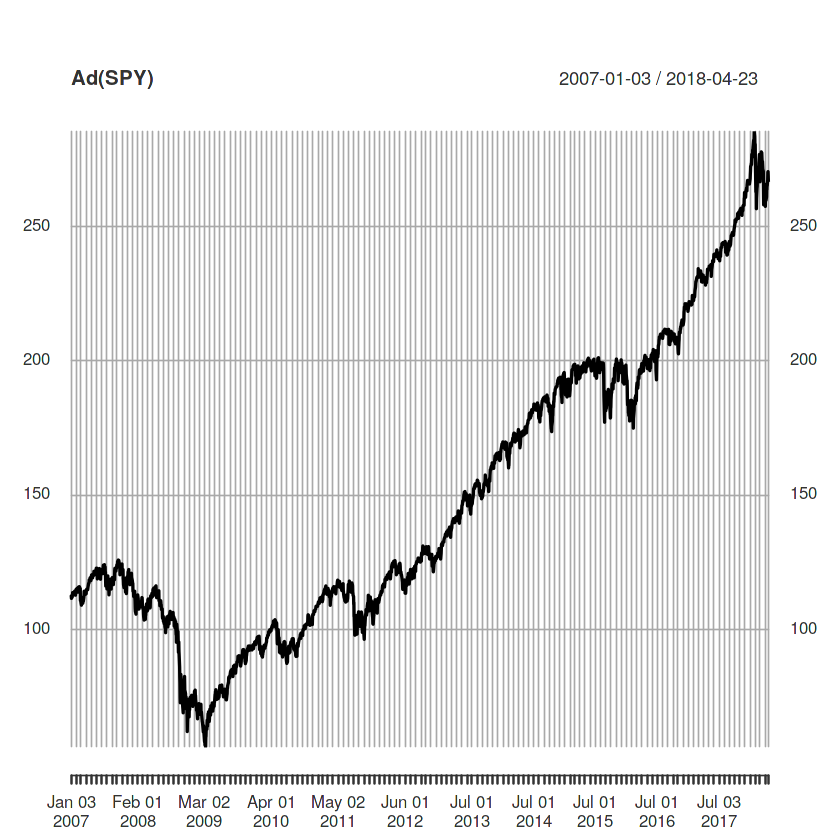

In [39]:
## Basic plotting from xts
plot(Ad(SPY))

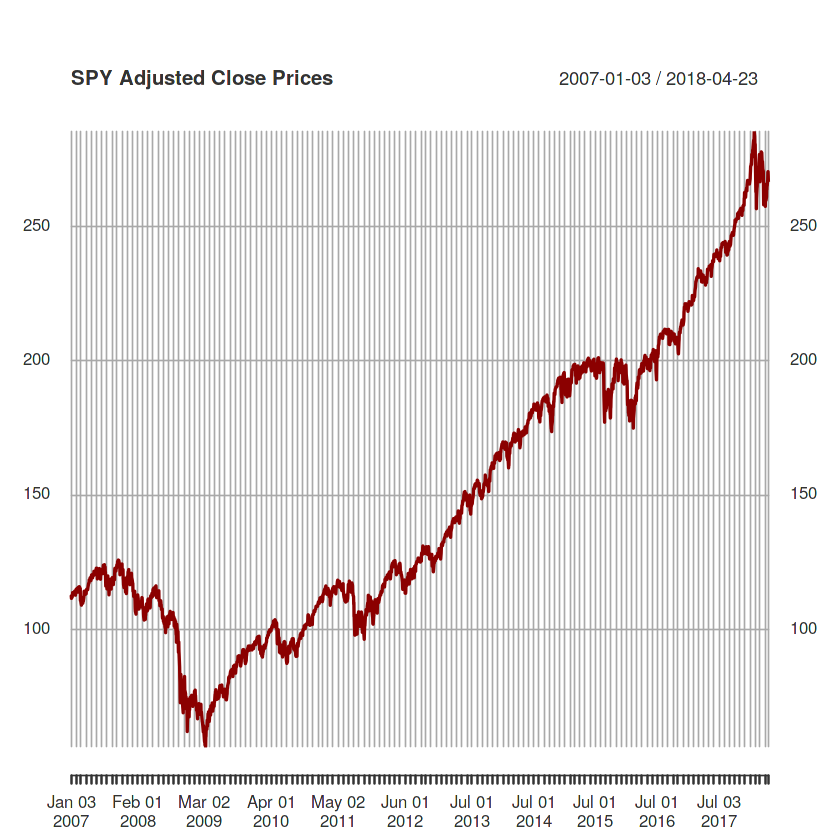

In [40]:
## plot() works like "base graphics" 
plot(Ad(SPY), main="SPY Adjusted Close Prices", col="red4")

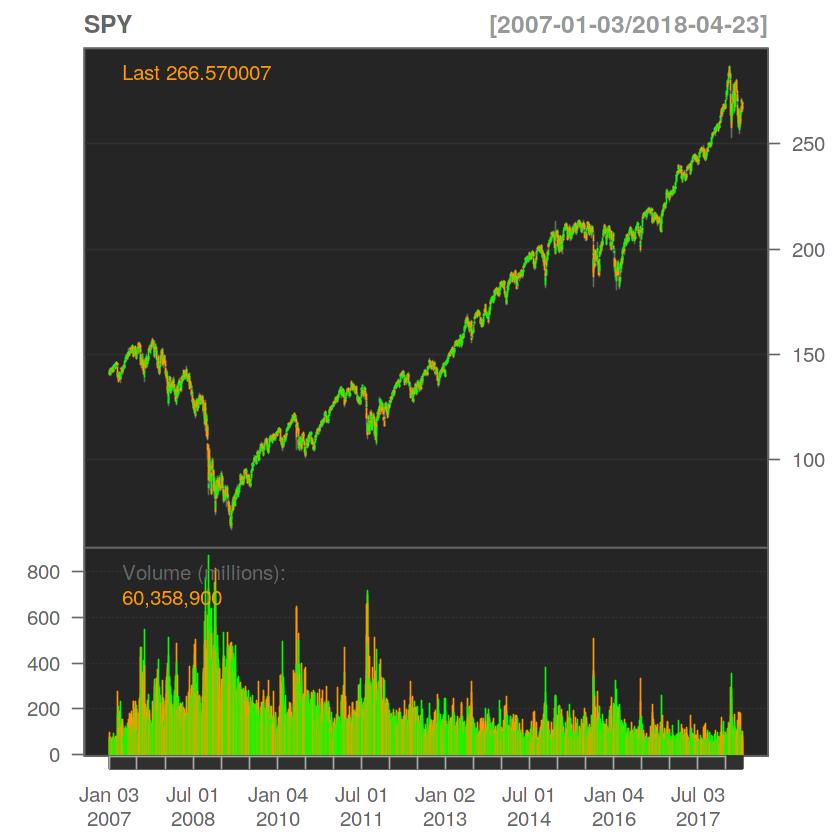

In [41]:
## If you want to use ggplot2, you have to do a bit of work to "massage" things into "tidy" format
## the `timetk` package is useful here
##
## If you want to do "fancy" charting, use the `chartSeries` function in `quantmod`
chartSeries(SPY)

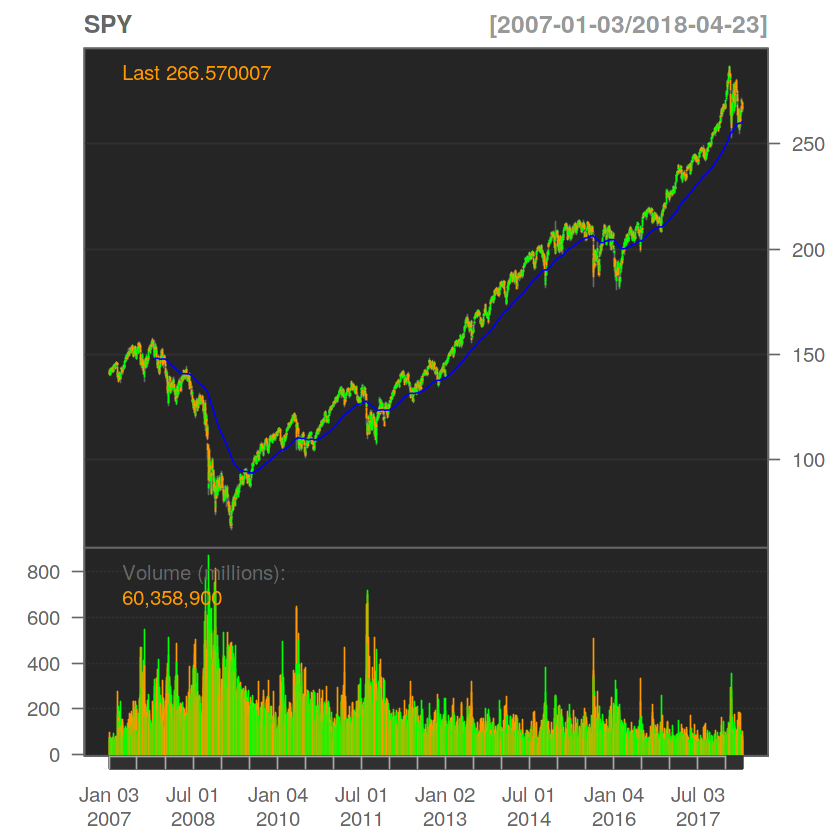

In [42]:
## We can add standard technical indicators
addEMA(n=200)

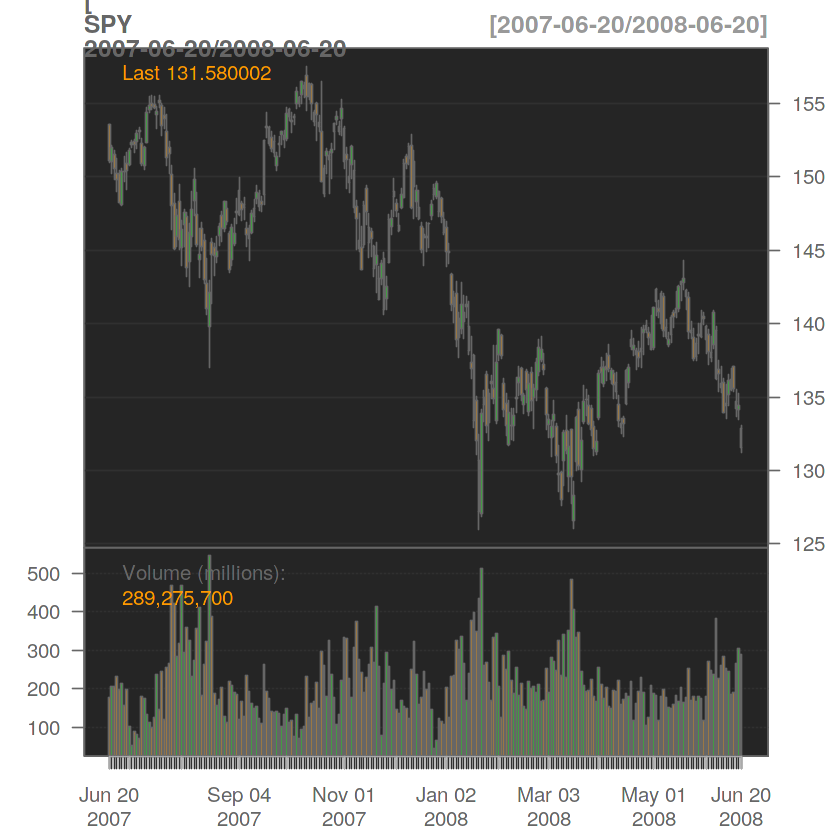

In [43]:
## Or a range
chartSeries(SPY["2007-06-20/2008-06-20"])

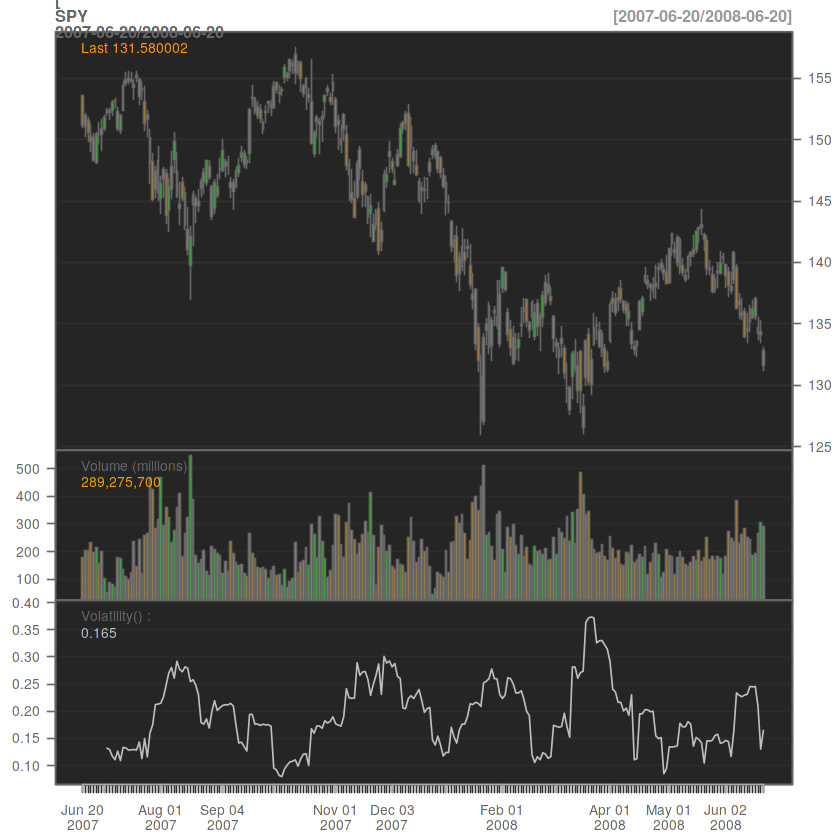

In [44]:
addVolatility()

Yours truly has a different xts plotting system, but it's not quite ready for prime-time -- https://github.com/michaelweylandt/xtsPlots